In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [13]:
df=pd.read_csv('/content/monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [14]:
df.shape

(169, 2)

In [15]:
df.isnull().sum()

Month                                                       0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    1
dtype: int64

In [16]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [17]:
df.drop(168,axis=0,inplace=True)
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [18]:
df.columns=['Month','Production']
df.head()

,Month,Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [19]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [21]:
df.set_index('Month',inplace=True)
df.head()

,Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [22]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


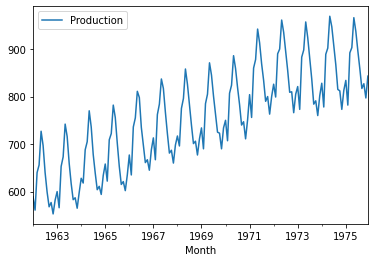

In [23]:
df.plot()

In [24]:
model_arima=ARIMA(df['Production'],order=(1,1,1))
model_arima_fit=model_arima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


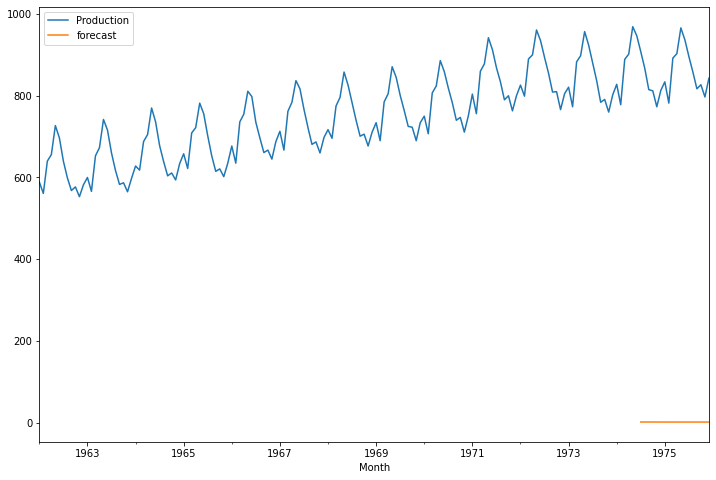

In [26]:
df['forecast']=model_arima_fit.predict(start=150,end=168,dynamic=True)
df[['Production','forecast']].plot(figsize=(12,8))

In [27]:
model_sarima=sm.tsa.statespace.SARIMAX(df['Production'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_sarima.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


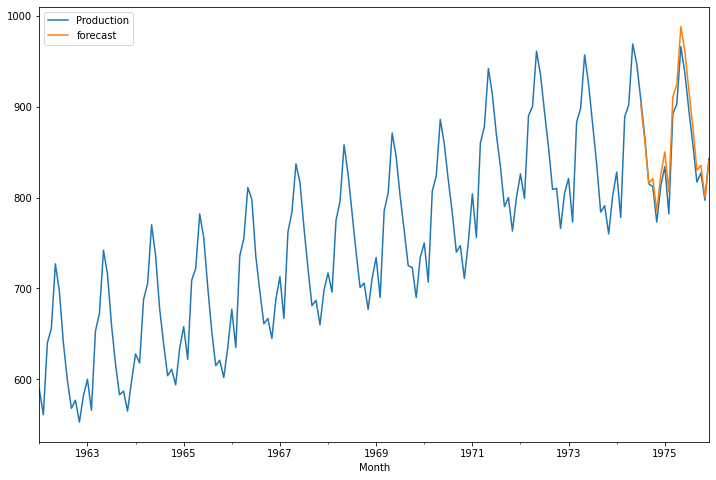

In [28]:
df['forecast']=results.predict(start=150,end=168,dynamic=True)
df[['Production','forecast']].plot(figsize=(12,8))

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [31]:
future_df=pd.concat([df,future_datest_df])

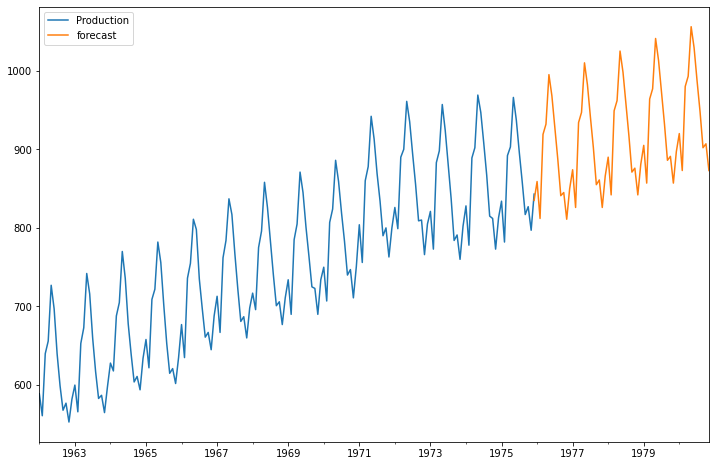

In [33]:
future_df['forecast'] = round(results.predict(start = 167, end = 229, dynamic= True),0)  
future_df[['Production', 'forecast']].plot(figsize=(12, 8)) 